In [17]:
print('신경망 - 다층 퍼셉트론(MLP)')
print('입력층 - 은닉층 - 출력층')
print('신경망을 이용한 Classification with MLP - ')

from sklearn.datasets          import load_breast_cancer
from sklearn.model_selection   import train_test_split 

datasets = load_breast_cancer()
print('type - ' , type(datasets))
print('keys - ' , datasets.keys())
print()
print()
print('data   - ' , datasets.data)
print()
print('target - ' , datasets.target)

신경망 - 다층 퍼셉트론(MLP)
입력층 - 은닉층 - 출력층
신경망을 이용한 Classification with MLP - 
type -  <class 'sklearn.utils.Bunch'>
keys -  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


data   -  [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]

target -  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1

In [16]:
X_train , X_test ,y_train , y_test = train_test_split(datasets.data   , 
                                                      datasets.target , 
                                                      test_size = 0.3 , 
                                                      random_state = 7)

print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(398, 30) (171, 30) (398,) (171,)


In [18]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers  import Activation , Dense 

print('1. 모델 생성 - Sequential')
print('생성된 모델에 레이어를 추가하는 작업 - ')

model = Sequential()

print('입력층 명시 - ') 
model.add( Dense(10 , input_shape = (30,) ) ) 
model.add( Activation('sigmoid'))

print('은닉층 명시 - ') 
model.add( Dense(10) ) 
model.add( Activation('sigmoid'))

model.add( Dense(10) ) 
model.add( Activation('sigmoid'))

print('출력층 명시 - ') 
model.add( Dense(1) ) 
model.add( Activation('sigmoid'))


1. 모델 생성 - Sequential
생성된 모델에 레이어를 추가하는 작업 - 
입력층 명시 - 
은닉층 명시 - 
출력층 명시 - 


In [6]:
print('2. 모델이 생성되었으면 학습 이전에 모델의 컴파일 선행이 필요 - ')
print('3. 모델 학습 - 모델 평가')

2. 모델이 생성되었으면 학습 이전에 모델의 컴파일 선행이 필요 - 
3. 모델 학습 - 모델 평가


In [20]:
from tensorflow.keras             import optimizers

sgd = optimizers.SGD(lr = 0.01 ) 

model.compile( optimizer = sgd , 
               loss      = 'binary_crossentropy' , 
               metrics   = 'accuracy')


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [21]:
print('모델 서머리 - ') 

model.summary()

모델 서머리 - 
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 activation (Activation)     (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 1)      

In [ ]:
print('모델 학습 - ') 

model.fit(X_train , y_train , 
          batch_size = 50 , 
          epochs     = 50 , 
          verbose    = 1) 


In [29]:
print('모델 평가 - ') 
print(model.metrics_names)

results = model.evaluate(X_test  ,y_test)
print(results)
print('loss     - ' , results[0])
print('accuracy - ' , results[1])



모델 평가 - 
['loss', 'accuracy']
6/6 [==============================] - 0s 3ms/step - loss: 0.6357 - accuracy: 0.6784
[0.6356821656227112, 0.6783625483512878]
loss     -  0.6356821656227112
accuracy -  0.6783625483512878


In [62]:
from sklearn.datasets          import load_breast_cancer
from sklearn.model_selection   import train_test_split 

from tensorflow.keras.models   import Sequential
from tensorflow.keras.layers   import Activation , Dense , BatchNormalization , Dropout
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras          import optimizers



print('신경망 - 다층 퍼셉트론(MLP)')
print('입력층 - 은닉층 - 출력층')
print('신경망을 이용한 Regression with MLP - ')

신경망 - 다층 퍼셉트론(MLP)
입력층 - 은닉층 - 출력층
신경망을 이용한 Regression with MLP - 


In [2]:
(X_train , y_train) , (X_test , y_test) = boston_housing.load_data()
X_train.shape , y_train.shape , X_test.shape , y_test.shape

65536/57026 [==================================] - 0s 0us/step


((404, 13), (404,), (102, 13), (102,))

In [5]:
model = Sequential()

model.add( Dense(10 , input_shape = (13,) ) ) 
model.add( Activation('sigmoid'))

model.add( Dense(10) ) 
model.add( Activation('sigmoid'))

model.add( Dense(10) ) 
model.add( Activation('sigmoid'))

model.add( Dense(1) ) 


In [6]:
# model = Sequential()

# model.add( Dense(10  , input_shape = (13,) , activation='sigmoid') ) 
# model.add( Dense(10) , activation='sigmoid' ) 
# model.add( Dense(10) , activation='sigmoid') 
# model.add( Dense(1) ) 

sgd = optimizers.SGD(lr = 0.01 ) 

model.compile( optimizer = sgd , 
               loss      = 'mean_squared_error' , 
               metrics   = 'mse')



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
model.fit(X_train , y_train , 
          batch_size = 50 , 
          epochs     = 50 , 
          verbose    = 1) 

In [8]:
print(model.metrics_names)

results = model.evaluate(X_test  ,y_test)
print(results)
print('loss     - ' , results[0])
print('accuracy - ' , results[1])

['loss', 'mse']
4/4 [==============================] - 0s 6ms/step - loss: 88.0741 - mse: 88.0741
[88.07408142089844, 88.07408142089844]
loss     -  88.07408142089844
accuracy -  88.07408142089844


In [10]:
print('MNIST - ') 

from   tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


MNIST - 


In [11]:
(X_train , y_train) , (X_test , y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [12]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

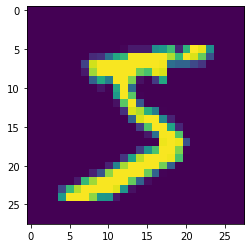


target -  5


In [16]:
plt.imshow(X_train[0])
plt.show()
print()
print('target - ' , y_train[0])

In [19]:
from   keras.utils.np_utils import to_categorical

In [23]:
'''
(N, 28 , 28) -> (N,  784)
'''
X_train = X_train.reshape( (X_train.shape[0], -1) )


In [24]:
X_train.shape

(60000, 784)

In [25]:
X_test = X_test.reshape( (X_test.shape[0], -1) )

In [26]:
X_test.shape

(10000, 784)

In [28]:
X_train , _ , y_train , _ = train_test_split(X_train , y_train ,
                                             test_size = 0.6     , 
                                             random_state = 100) 


In [30]:
X_train.shape

((24000, 784), array([8, 8, 1, ..., 6, 2, 5], dtype=uint8))

In [32]:
y_train[0]

8

In [33]:
y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

In [34]:
X_train.shape , y_train.shape , X_test.shape , y_test.shape

((24000, 784), (24000, 10), (10000, 784), (10000, 10))

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
print('vanilla MLP - ')

model = Sequential()

model.add( Dense(50 , input_shape = (784,) ) ) 
model.add( Activation('sigmoid'))


model.add( Dense(50) ) 
model.add( Activation('sigmoid'))

model.add( Dense(50) ) 
model.add( Activation('sigmoid'))

model.add( Dense(50) ) 
model.add( Activation('sigmoid'))

model.add( Dense(10) ) 
model.add( Activation('softmax'))

sgd = optimizers.SGD(lr = 0.001 ) 

model.compile( optimizer = sgd , 
               loss      = 'categorical_crossentropy' , 
               metrics   = 'accuracy')

history = model.fit(X_train , y_train , 
                    batch_size       = 256 , 
                    epochs           = 100 ,
                    validation_split = 0.3 , 
                    verbose          = 1) 




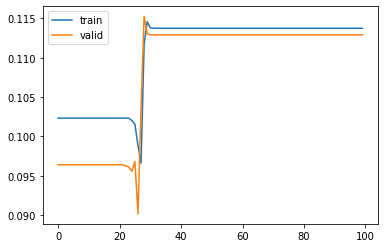

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train' , 'valid'] , loc = 'best')

plt.show()
plt.close()

In [41]:
print('improving tech for MLP - ') 

print('1. 활성화 함수 - 옵티마이저 변경') 
print('2. 가중치 초기화 ') 
print('3. 배치 정규화')
print('4. 드랍아웃')
print('5. 앙상블') 





improving tech for MLP - 
1. 활성화 함수 - 옵티마이저 변경
2. 가중치 초기화 
3. 배치 정규화
4. 드랍아웃
5. 앙상블


In [42]:
print('가중치 초기화', 'https://keras.io/api/layers/initializers/')

가중치 초기화 https://keras.io/api/layers/initializers/


In [43]:
def vanilla_model() :
  model = Sequential()

  model.add( Dense(50 , input_shape = (784,) , 
             kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))


  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(10 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.001 ) 

  model.compile( optimizer = sgd , 
                loss      = 'categorical_crossentropy' , 
                metrics   = 'accuracy')
  
  return model 

In [ ]:
model   = vanilla_model()
history = model.fit(X_train , y_train , 
                    batch_size       = 256 , 
                    epochs           = 100 ,
                    validation_split = 0.3 , 
                    verbose          = 1) 

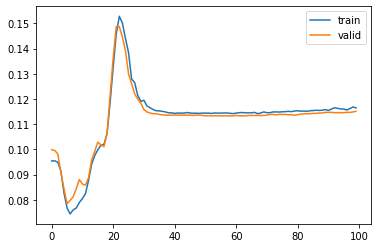

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train' , 'valid'] , loc = 'best')

plt.show()
plt.close()

In [50]:
def activation_model() :
  model = Sequential()

  model.add( Dense(50 , input_shape = (784,) , 
             kernel_initializer = 'he_normal') ) 
  model.add( Activation('relu'))


  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('relu'))

  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('relu'))

  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('relu'))

  model.add( Dense(10 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.001 ) 

  model.compile( optimizer = sgd , 
                loss      = 'categorical_crossentropy' , 
                metrics   = 'accuracy')
  
  return model 

In [ ]:
model   = activation_model()
history = model.fit(X_train , y_train , 
                    batch_size       = 256 , 
                    epochs           = 100 ,
                    validation_split = 0.3 , 
                    verbose          = 1) 

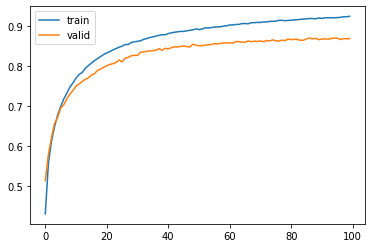

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train' , 'valid'] , loc = 'best')

plt.show()
plt.close()

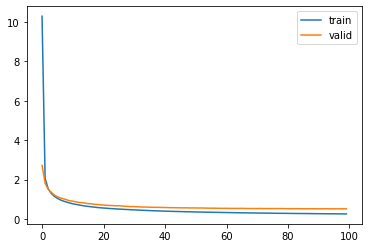

In [53]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.legend(['train' , 'valid'] , loc = 'best')

plt.show()
plt.close()

In [54]:
def optimization_model() :
  model = Sequential()

  model.add( Dense(50 , input_shape = (784,) , 
             kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))


  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(50 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(10 , kernel_initializer = 'he_normal') ) 
  model.add( Activation('softmax'))

  adam = optimizers.Adam(lr = 0.001 ) 

  model.compile( optimizer = adam , 
                loss       = 'categorical_crossentropy' , 
                metrics    = 'accuracy')
  
  return model 

In [ ]:
model   = optimization_model()
history = model.fit(X_train , y_train , 
                    batch_size       = 256 , 
                    epochs           = 100 ,
                    validation_split = 0.3 , 
                    verbose          = 1) 

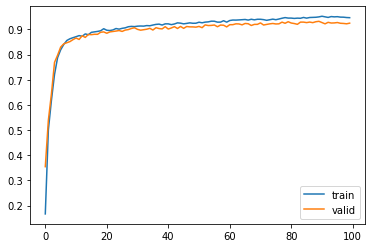

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train' , 'valid'] , loc = 'best')

plt.show()
plt.close()

In [59]:
def normalization_model() :
  model = Sequential()

  model.add( Dense(50 , input_shape = (784,) ) )
  model.add( BatchNormalization()  )
  model.add( Activation('sigmoid') ) 

  

  model.add( Dense(50) ) 
  model.add( BatchNormalization()  )
  model.add( Activation('sigmoid'))

  model.add( Dense(50 ) )
  model.add( BatchNormalization()  )
  model.add( Activation('sigmoid'))

  model.add( Dense(50) ) 
  model.add( BatchNormalization()  )
  model.add( Activation('sigmoid'))

  model.add( Dense(10) ) 
  model.add( Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.001 ) 

  model.compile( optimizer = sgd , 
                 loss       = 'categorical_crossentropy' , 
                 metrics    = 'accuracy')
  
  return model 

In [ ]:
model   = normalization_model()
history = model.fit(X_train , y_train , 
                    batch_size       = 256 , 
                    epochs           = 100 ,
                    validation_split = 0.3 , 
                    verbose          = 1) 

In [61]:
results = model.evaluate(X_test , y_test) 
print('acc - ' , results[1])

313/313 [==============================] - 1s 4ms/step - loss: 1.1273 - accuracy: 0.8447
acc -  0.8446999788284302


In [63]:
def dropout_model() :
  model = Sequential()

  model.add( Dense(50 , input_shape = (784,) ) )
  model.add( Activation('sigmoid') ) 
  model.add( Dropout(0.2)  )

  model.add( Dense(50) ) 
  model.add( Activation('sigmoid'))
  model.add( Dropout(0.2)  )

  model.add( Dense(50 ) )
  model.add( Activation('sigmoid'))
  model.add( Dropout(0.2)  )

  model.add( Dense(50) ) 
  model.add( Activation('sigmoid'))
  model.add( Dropout(0.2)  )
  
  model.add( Dense(10) ) 
  model.add( Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.001 ) 

  model.compile( optimizer = sgd , 
                 loss       = 'categorical_crossentropy' , 
                 metrics    = 'accuracy')
  
  return model 

In [ ]:
model   = dropout_model()
history = model.fit(X_train , y_train , 
                    batch_size       = 256 , 
                    epochs           = 100 ,
                    validation_split = 0.3 , 
                    verbose          = 1) 

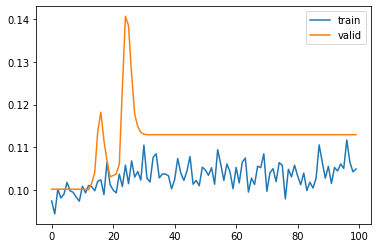

In [65]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.legend(['train' , 'valid'] , loc = 'best')

plt.show()
plt.close()

In [69]:
import numpy as np 

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.ensemble import VotingClassifier 
from sklearn.metrics  import accuracy_score 


In [77]:
def ensemble_model() :
  model = Sequential()

  model.add( Dense(50 , input_shape = (784,) ) ) 
  model.add( Activation('sigmoid'))


  model.add( Dense(50) ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(50) ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(50) ) 
  model.add( Activation('sigmoid'))

  model.add( Dense(10) ) 
  model.add( Activation('softmax'))

  sgd = optimizers.SGD(lr = 0.001 ) 

  model.compile( optimizer = sgd , 
                loss      = 'categorical_crossentropy' , 
                metrics   = 'accuracy')
  
  return model 

In [84]:
print('서로 다른 성능이 나쁜 모델의 생성 - ') 
mlp01 = KerasClassifier(build_fn = ensemble_model , epochs = 100 , verbose = 0) 
mlp02 = KerasClassifier(build_fn = ensemble_model , epochs = 100 , verbose = 0) 
mlp03 = KerasClassifier(build_fn = ensemble_model , epochs = 100 , verbose = 0) 

mlp01._estimator_type = 'classifier'
mlp02._estimator_type = 'classifier'
mlp03._estimator_type = 'classifier'

서로 다른 성능이 나쁜 모델의 생성 - 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [86]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape 


((24000, 784), (10000, 784), (24000, 10), (10000, 10))

In [ ]:
y_train = np.argmax(y_train, axis = 1) 
y_test  = np.argmax(y_test, axis = 1)

clf = VotingClassifier(estimators = [('model01' , mlp01),
                                     ('model02' , mlp02),
                                     ('model03' , mlp03)] , voting = 'soft' )

clf.fit(X_train,  y_train)
y_pred = clf.predict(X_test) 



In [88]:
print('acc - ' , accuracy_score(y_pred , y_test)) 

acc -  0.4861
